In [9]:
import pandas as pd
from pandas import DataFrame as df
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [2]:
topics_data = pd.read_csv('documentaries_1000.csv')

(array([703., 178.,  62.,  21.,  14.,   7.,   2.,   3.,   2.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3139. ,   9149.7,  15160.4,  21171.1,  27181.8,  33192.5,
         39203.2,  45213.9,  51224.6,  57235.3,  63246. ,  69256.7,
         75267.4,  81278.1,  87288.8,  93299.5,  99310.2, 105320.9,
        111331.6, 117342.3, 123353. ]),
 <a list of 20 Patch objects>)

3139
123353
8731.48743718593
6285.0


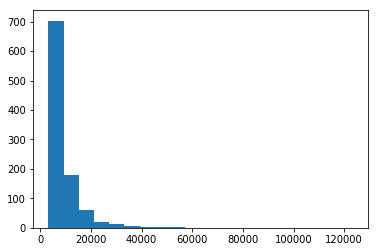

In [57]:
#Histogram of scores
score_hist = plt.hist(topics_data['score'], bins=20)
display(score_hist)

print(np.amin(topics_data['score']))
print(np.amax(topics_data['score']))
print(np.mean(topics_data['score']))
print(np.median(topics_data['score']))

(array([556., 273.,  85.,  39.,  24.,   6.,   4.,   0.,   3.,   1.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   56.,   701.,  1346.,  1991.,  2636.,  3281.,  3926.,  4571.,
         5216.,  5861.,  6506.,  7151.,  7796.,  8441.,  9086.,  9731.,
        10376., 11021., 11666., 12311., 12956.]),
 <a list of 20 Patch objects>)

56
12956
889.940703517588
606.0


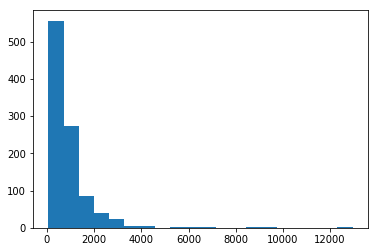

In [59]:
#Histogram of number of comments
comm_hist = plt.hist(topics_data['comms_num'], bins=20)
display(comm_hist)

print(np.amin(topics_data['comms_num']))
print(np.amax(topics_data['comms_num']))
print(np.mean(topics_data['comms_num']))
print(np.median(topics_data['comms_num']))

In [53]:
# Top 50 words, not including stop words
cv = CountVectorizer(stop_words='english')
title_matrix = cv.fit_transform(topics_data['title'])
title_words = cv.get_feature_names()

top_indices = np.argsort(np.sum(title_matrix.toarray(), axis=0))
for i in range(50):
    print(title_words[top_indices[-1 * (i+1)]])

documentary
2017
2018
2016
world
life
2015
story
years
people
film
2014
war
american
history
man
year
drug
2013
look
trailer
time
america
old
new
cc
inside
bbc
2019
series
footage
2008
00
2012
short
2011
body
prison
day
like
children
10
human
death
making
rise
media
pbs
2010
lives


In [68]:
df_matrix = np.where(title_matrix.toarray() > 0, 1 ,0)
top_indices_df = np.argsort(np.sum(df_matrix, axis=0)).tolist()

top_words_df = [title_words[i] for i in top_indices_df[-50:]]
top_words_df.reverse()

print(top_words_df)

['documentary', '2017', '2018', '2016', 'world', 'life', '2015', 'story', 'years', '2014', 'people', 'film', 'war', 'american', 'year', 'man', 'history', 'trailer', 'look', '2013', 'time', 'new', 'cc', 'america', 'old', 'inside', 'bbc', '2008', '2019', '2012', 'series', 'footage', 'drug', 'short', '2011', '00', 'like', 'children', 'death', 'rise', 'making', 'pbs', '2010', 'lives', 'media', 'day', 'earth', '01', '10', 'real']


(array([ 3.,  1., 15., 16., 36., 40., 48., 41., 42., 51., 46., 54., 57.,
        46., 45., 45., 47., 47., 39., 48., 31., 39., 31., 33., 15., 22.,
        17., 15.,  6.,  9.,  4.,  2.,  1.,  3.]),
 array([ 2.        ,  2.97058824,  3.94117647,  4.91176471,  5.88235294,
         6.85294118,  7.82352941,  8.79411765,  9.76470588, 10.73529412,
        11.70588235, 12.67647059, 13.64705882, 14.61764706, 15.58823529,
        16.55882353, 17.52941176, 18.5       , 19.47058824, 20.44117647,
        21.41176471, 22.38235294, 23.35294118, 24.32352941, 25.29411765,
        26.26470588, 27.23529412, 28.20588235, 29.17647059, 30.14705882,
        31.11764706, 32.08823529, 33.05882353, 34.02941176, 35.        ]),
 <a list of 34 Patch objects>)

2
35
16.048241206030152
16.0


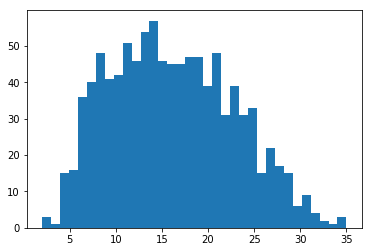

In [63]:
num_words = np.sum(title_matrix.toarray(), axis=1)
words_hist = plt.hist(num_words, bins=34)
display(words_hist)

print(np.amin(num_words))
print(np.amax(num_words))
print(np.mean(num_words))
print(np.median(num_words))

In [66]:
j = 0

for i in topics_data['url']:
    if 'youtube' in i:
        j += 1

print(j)

600


In [67]:
print(len(topics_data))

995
